In [4]:
from keras.datasets import cifar10
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,Activation
from keras.models import Model
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 1277s 7us/step


image is: [6]


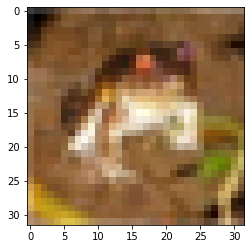

image is: [9]


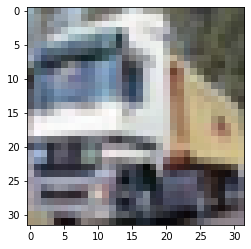

image is: [9]


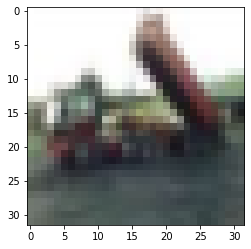

image is: [4]


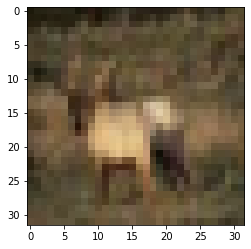

image is: [1]


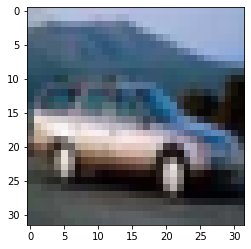

In [6]:
for i in range(5):
    print("image is:",ytrain[i])
    plt.imshow(xtrain[i])
    plt.show()

In [7]:
xtrain=xtrain.astype("float32")
xtest=xtest.astype("float32")
xtrain=xtrain/255
xtest=xtest/255

ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)
xtest.shape


(10000, 32, 32, 3)

In [8]:
# autoencoder model
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(16, (3, 3), padding='same')(encoded)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
decoded = Activation('sigmoid')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0  

In [ ]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(xtest, xtest),
                )



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 25s 490us/step - loss: 0.6352 - val_loss: 0.6105
Epoch 2/100
50000/50000 [==============================] - 14s 271us/step - loss: 0.6065 - val_loss: 0.5961
Epoch 3/100
50000/50000 [==============================] - 14s 278us/step - loss: 0.5977 - val_loss: 0.5956
Epoch 4/100
50000/50000 [==============================] - 14s 279us/step - loss: 0.5933 - val_loss: 0.5920
Epoch 5/100
50000/50000 [==============================] - 14s 270us/step - loss: 0.5907 - val_loss: 0.5937
Epoch 6/100
50000/50000 [==============================] - 13s 270us/step - loss: 0.5885 - val_loss: 0.5886
Epoch 7/100
50000/50000 [==============================] - 13s 270us/step - loss: 0.5868 - val_loss: 0.5854
Epoch 8/100
50000/50000 [==============================] - 14s 270us/step - loss: 0.5856 - val_loss: 0.5863
Epoch 9/100
50000/50000 [==============================] - 14s 276us/step - loss: 0.5

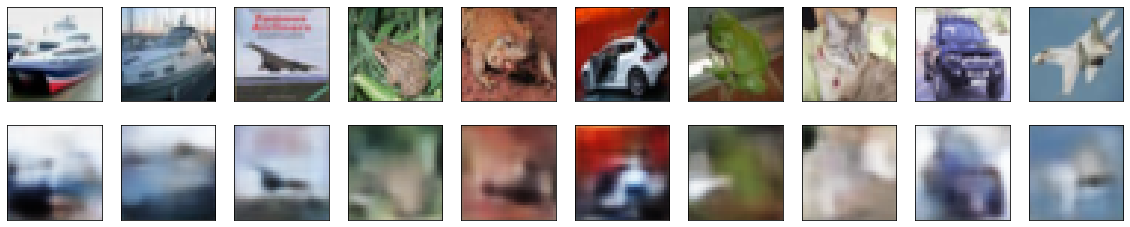

In [21]:
decoded_imgs = autoencoder.predict(xtest)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(xtest[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()